In [1]:
import json
import jieba
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [2]:
with open('shijing.json', 'r') as shijing_file:
    poems = json.load(shijing_file)
    print(poems)

[{'title': '关雎', 'chapter': '国风', 'section': '周南', 'content': ['关关雎鸠，在河之洲。窈窕淑女，君子好逑。', '参差荇菜，左右流之。窈窕淑女，寤寐求之。', '求之不得，寤寐思服。悠哉悠哉，辗转反侧。', '参差荇菜，左右采之。窈窕淑女，琴瑟友之。', '参差荇菜，左右芼之。窈窕淑女，钟鼓乐之。']}, {'title': '葛覃', 'chapter': '国风', 'section': '周南', 'content': ['葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。', '葛之覃兮，施于中谷，维叶莫莫。是刈是濩，为絺为绤，服之无斁。', '言告师氏，言告言归。薄污我私，薄浣我衣。害浣害否，归宁父母。']}, {'title': '卷耳', 'chapter': '国风', 'section': '周南', 'content': ['采采卷耳，不盈顷筐。嗟我怀人，置彼周行。', '陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永怀。', '陟彼高冈，我马玄黄。我姑酌彼兕觥，维以不永伤。', '陟彼砠矣，我马瘏矣，我仆痡矣，云何吁矣。']}, {'title': '樛木', 'chapter': '国风', 'section': '周南', 'content': ['南有樛木，葛藟累之。乐只君子，福履绥之。', '南有樛木，葛藟荒之。乐只君子，福履将之。', '南有樛木，葛藟萦之。乐只君子，福履成之。']}, {'title': '螽斯', 'chapter': '国风', 'section': '周南', 'content': ['螽斯羽，诜诜兮。宜尔子孙，振振兮。', '螽斯羽，薨薨兮。宜尔子孙。绳绳兮。', '螽斯羽，揖揖兮。宜尔子孙，蛰蛰兮。']}, {'title': '桃夭', 'chapter': '国风', 'section': '周南', 'content': ['桃之夭夭，灼灼其华。之子于归，宜其室家。', '桃之夭夭，有蕡其实。之子于归，宜其家室。', '桃之夭夭，其叶蓁蓁。之子于归，宜其家人。']}, {'title': '兔罝', 'chapter': '国风', 'section': '周南', 'content': ['肃肃兔罝，椓之丁丁。赳赳武夫，公侯干城。'

In [3]:
poems

[{'title': '关雎',
  'chapter': '国风',
  'section': '周南',
  'content': ['关关雎鸠，在河之洲。窈窕淑女，君子好逑。',
   '参差荇菜，左右流之。窈窕淑女，寤寐求之。',
   '求之不得，寤寐思服。悠哉悠哉，辗转反侧。',
   '参差荇菜，左右采之。窈窕淑女，琴瑟友之。',
   '参差荇菜，左右芼之。窈窕淑女，钟鼓乐之。']},
 {'title': '葛覃',
  'chapter': '国风',
  'section': '周南',
  'content': ['葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。',
   '葛之覃兮，施于中谷，维叶莫莫。是刈是濩，为絺为绤，服之无斁。',
   '言告师氏，言告言归。薄污我私，薄浣我衣。害浣害否，归宁父母。']},
 {'title': '卷耳',
  'chapter': '国风',
  'section': '周南',
  'content': ['采采卷耳，不盈顷筐。嗟我怀人，置彼周行。',
   '陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永怀。',
   '陟彼高冈，我马玄黄。我姑酌彼兕觥，维以不永伤。',
   '陟彼砠矣，我马瘏矣，我仆痡矣，云何吁矣。']},
 {'title': '樛木',
  'chapter': '国风',
  'section': '周南',
  'content': ['南有樛木，葛藟累之。乐只君子，福履绥之。',
   '南有樛木，葛藟荒之。乐只君子，福履将之。',
   '南有樛木，葛藟萦之。乐只君子，福履成之。']},
 {'title': '螽斯',
  'chapter': '国风',
  'section': '周南',
  'content': ['螽斯羽，诜诜兮。宜尔子孙，振振兮。', '螽斯羽，薨薨兮。宜尔子孙。绳绳兮。', '螽斯羽，揖揖兮。宜尔子孙，蛰蛰兮。']},
 {'title': '桃夭',
  'chapter': '国风',
  'section': '周南',
  'content': ['桃之夭夭，灼灼其华。之子于归，宜其室家。',
   '桃之夭夭，有蕡其实。之子于归，宜其家室。',
   '桃之夭夭，其叶蓁蓁。之子于归，宜其家人。']},
 {'t

In [4]:
sentences=[]
for i in poems[0]['content']:
    sentences.append(i)
sentences

['关关雎鸠，在河之洲。窈窕淑女，君子好逑。',
 '参差荇菜，左右流之。窈窕淑女，寤寐求之。',
 '求之不得，寤寐思服。悠哉悠哉，辗转反侧。',
 '参差荇菜，左右采之。窈窕淑女，琴瑟友之。',
 '参差荇菜，左右芼之。窈窕淑女，钟鼓乐之。']

In [5]:
poems[0]['content'][1]

'参差荇菜，左右流之。窈窕淑女，寤寐求之。'

In [6]:
def SingCut(text):
    #stopwords = '而|何|乎|乃|其|且|若|所|为|焉|以|因|与|于|也|则|者|之|不|得|一|可|是|已|此|的|子|兮|三|中｜？|！|矣|彼｜既｜尔｜'                               
    stopwords = '而｜何｜乎｜乃｜其｜且｜若｜所｜为｜焉｜以｜因｜与｜于｜也｜则｜者｜之｜不｜得｜可｜是｜已｜此｜的｜兮｜中｜矣｜\
    在｜彼｜又｜亦｜有｜无｜既｜或｜之｜？|！｜维｜尔｜子｜哉｜斯|\n|)|\ue85d|\ue85f|:|?|{|}|“|”|。|，|、|【|】|\u3000|◎|.|（|！|'

    tex = [i.strip('\n').strip('\r').strip('。').strip('，|)|:|{|}|"|"|□|.|(|\n') for i in text if i not in stopwords]
    return list(filter(None,tex))

In [7]:
words=[]
words_s=[]
sentences_all=[]

for i in range(len(poems)):
    sentences=poems[i]['content']
    sentences_all.append(sentences)
    s=[]
    for j in range(len(sentences)):
        s=s+SingCut(sentences[j])
        words.append(SingCut(sentences[j]))
    words_s.append(s)
words_s


[['关',
  '关',
  '雎',
  '鸠',
  '河',
  '洲',
  '窈',
  '窕',
  '淑',
  '女',
  '君',
  '好',
  '逑',
  '参',
  '差',
  '荇',
  '菜',
  '左',
  '右',
  '流',
  '窈',
  '窕',
  '淑',
  '女',
  '寤',
  '寐',
  '求',
  '求',
  '寤',
  '寐',
  '思',
  '服',
  '悠',
  '悠',
  '辗',
  '转',
  '反',
  '侧',
  '参',
  '差',
  '荇',
  '菜',
  '左',
  '右',
  '采',
  '窈',
  '窕',
  '淑',
  '女',
  '琴',
  '瑟',
  '友',
  '参',
  '差',
  '荇',
  '菜',
  '左',
  '右',
  '芼',
  '窈',
  '窕',
  '淑',
  '女',
  '钟',
  '鼓',
  '乐'],
 ['葛',
  '覃',
  '施',
  '谷',
  '叶',
  '萋',
  '萋',
  '黄',
  '鸟',
  '飞',
  '集',
  '灌',
  '木',
  '鸣',
  '喈',
  '喈',
  '葛',
  '覃',
  '施',
  '谷',
  '叶',
  '莫',
  '莫',
  '刈',
  '濩',
  '絺',
  '绤',
  '服',
  '斁',
  '言',
  '告',
  '师',
  '氏',
  '言',
  '告',
  '言',
  '归',
  '薄',
  '污',
  '我',
  '私',
  '薄',
  '浣',
  '我',
  '衣',
  '害',
  '浣',
  '害',
  '否',
  '归',
  '宁',
  '父',
  '母'],
 ['采',
  '采',
  '卷',
  '耳',
  '盈',
  '顷',
  '筐',
  '嗟',
  '我',
  '怀',
  '人',
  '置',
  '周',
  '行',
  '陟',
  '崔',
  '嵬',
  '我',
  '马',
  '虺',
  '隤',
  '我',
  '姑',
  '酌

In [8]:
sentences_all

[['关关雎鸠，在河之洲。窈窕淑女，君子好逑。',
  '参差荇菜，左右流之。窈窕淑女，寤寐求之。',
  '求之不得，寤寐思服。悠哉悠哉，辗转反侧。',
  '参差荇菜，左右采之。窈窕淑女，琴瑟友之。',
  '参差荇菜，左右芼之。窈窕淑女，钟鼓乐之。'],
 ['葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。',
  '葛之覃兮，施于中谷，维叶莫莫。是刈是濩，为絺为绤，服之无斁。',
  '言告师氏，言告言归。薄污我私，薄浣我衣。害浣害否，归宁父母。'],
 ['采采卷耳，不盈顷筐。嗟我怀人，置彼周行。',
  '陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永怀。',
  '陟彼高冈，我马玄黄。我姑酌彼兕觥，维以不永伤。',
  '陟彼砠矣，我马瘏矣，我仆痡矣，云何吁矣。'],
 ['南有樛木，葛藟累之。乐只君子，福履绥之。', '南有樛木，葛藟荒之。乐只君子，福履将之。', '南有樛木，葛藟萦之。乐只君子，福履成之。'],
 ['螽斯羽，诜诜兮。宜尔子孙，振振兮。', '螽斯羽，薨薨兮。宜尔子孙。绳绳兮。', '螽斯羽，揖揖兮。宜尔子孙，蛰蛰兮。'],
 ['桃之夭夭，灼灼其华。之子于归，宜其室家。', '桃之夭夭，有蕡其实。之子于归，宜其家室。', '桃之夭夭，其叶蓁蓁。之子于归，宜其家人。'],
 ['肃肃兔罝，椓之丁丁。赳赳武夫，公侯干城。', '肃肃兔罝，施于中逵。赳赳武夫，公侯好仇。', '肃肃免罝，施于中林。赳赳武夫，公侯腹心。'],
 ['采采芣苡，薄言采之。采采芣苡，薄言有之。', '采采芣苡，薄言掇之。采采芣苡，薄言捋之。', '采采芣苡，薄言袺之。采采芣苡，薄言襭之。'],
 ['南有乔木，不可休息。汉有游女，不可求思。汉之广矣，不可泳思。江之永矣，不可方思。',
  '翘翘错薪，言刈其楚。之子于归，言秣其马。汉之广矣，不可泳思。江之永矣，不可方思。',
  '翘翘错薪，言刈其蒌。之子于归。言秣其驹。汉之广矣，不可泳思。江之永矣，不可方思。'],
 ['遵彼汝坟，伐其条枚。未见君子，惄如调饥。', '遵彼汝坟，伐其条肄。既见君子，不我遐弃。', '鲂鱼赪尾，王室如毁。虽则如毁，父母孔迩。'],
 ['麟之趾，振振公子，于嗟麟兮。', '麟之定，振振公姓，于嗟麟兮。', '麟之角，振振公族，于嗟麟兮。'],
 ['维鹊有巢，维鸠居之

In [9]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import CoherenceModel, LdaModel
from gensim import models
from gensim.test.utils import datapath
import operator
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['font.family']=['Arial Unicode MS']

plt.rcParams['axes.unicode_minus']=False

In [462]:
# 创建语料的词语词典，每个单独的词语都会被赋予一个索引
dictionary = corpora.Dictionary(words)

# 使用上面的词典，将转换文档列表（语料）变成 DT 矩阵
doc_term_matrix = [dictionary.doc2bow(doc) for doc in words]

In [463]:
final_title = ""
for i in words:
    word_i = i
    for t in word_i:
        final_title+=t
#title_cut = jieba.cut(final_title)
#result = " ".join(title_cut)
#result  
result = " ".join(final_title)
result

'关 关 雎 鸠 河 洲 窈 窕 淑 女 君 好 逑 参 差 荇 菜 左 右 流 窈 窕 淑 女 寤 寐 求 求 寤 寐 思 服 悠 悠 辗 转 反 侧 参 差 荇 菜 左 右 采 窈 窕 淑 女 琴 瑟 友 参 差 荇 菜 左 右 芼 窈 窕 淑 女 钟 鼓 乐 葛 覃 施 谷 叶 萋 萋 黄 鸟 飞 集 灌 木 鸣 喈 喈 葛 覃 施 谷 叶 莫 莫 刈 濩 絺 绤 服 斁 言 告 师 氏 言 告 言 归 薄 污 我 私 薄 浣 我 衣 害 浣 害 否 归 宁 父 母 采 采 卷 耳 盈 顷 筐 嗟 我 怀 人 置 周 行 陟 崔 嵬 我 马 虺 隤 我 姑 酌 金 罍 永 怀 陟 高 冈 我 马 玄 黄 我 姑 酌 兕 觥 永 伤 陟 砠 我 马 瘏 我 仆 痡 云 吁 南 樛 木 葛 藟 累 乐 只 君 福 履 绥 南 樛 木 葛 藟 荒 乐 只 君 福 履 将 南 樛 木 葛 藟 萦 乐 只 君 福 履 成 螽 羽 诜 诜 宜 孙 振 振 螽 羽 薨 薨 宜 孙 绳 绳 螽 羽 揖 揖 宜 孙 蛰 蛰 桃 夭 夭 灼 灼 华 归 宜 室 家 桃 夭 夭 蕡 实 归 宜 家 室 桃 夭 夭 叶 蓁 蓁 归 宜 家 人 肃 肃 兔 罝 椓 丁 丁 赳 赳 武 夫 公 侯 干 城 肃 肃 兔 罝 施 逵 赳 赳 武 夫 公 侯 好 仇 肃 肃 免 罝 施 林 赳 赳 武 夫 公 侯 腹 心 采 采 芣 苡 薄 言 采 采 采 芣 苡 薄 言 采 采 芣 苡 薄 言 掇 采 采 芣 苡 薄 言 捋 采 采 芣 苡 薄 言 袺 采 采 芣 苡 薄 言 襭 南 乔 木 休 息 汉 游 女 求 思 汉 广 泳 思 江 永 方 思 翘 翘 错 薪 言 刈 楚 归 言 秣 马 汉 广 泳 思 江 永 方 思 翘 翘 错 薪 言 刈 蒌 归 言 秣 驹 汉 广 泳 思 江 永 方 思 遵 汝 坟 伐 条 枚 未 见 君 惄 如 调 饥 遵 汝 坟 伐 条 肄 见 君 我 遐 弃 鲂 鱼 赪 尾 王 室 如 毁 虽 如 毁 父 母 孔 迩 麟 趾 振 振 公 嗟 麟 麟 定 振 振 公 姓 嗟 麟 麟 角 振 振 公 族 嗟 麟 鹊 巢 鸠 居 归 百 两 御 鹊 巢 鸠 方 归 百 两 将 鹊 巢 鸠 盈 归 百 两 成 采 蘩 沼 沚 用 公 侯 事 采 蘩 涧 用 公 侯

In [464]:
wc=WordCloud(font_path = "/System/Library/Fonts/Pingfang.ttc", # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
    width=400, # 默认宽度
    height=400, # 默认高度
    margin=2, # 边缘
    ranks_only=None, 
    prefer_horizontal=0.9, 
    mask=None, # 背景图形，如果想根据图片绘制，则需要设置
    scale=2, 
   color_func=None, 
   max_words=100, # 最多显示的词汇量
   min_font_size=4, # 最小字号
   stopwords=None, # 停止词设置，修正词云图时需要设置
   random_state=None, 
   background_color='white', # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
   max_font_size=None, # 最大字号
   font_step=1, 
   mode='RGB', 
   relative_scaling='auto', 
   regexp=None, 
   collocations=True, 
   colormap='Reds', # matplotlib 色图，可更改名称进而更改整体风格
   normalize_plurals=True, 
   contour_width=0, 
   contour_color='black', 
   repeat=False)
wc.generate_from_text(result)

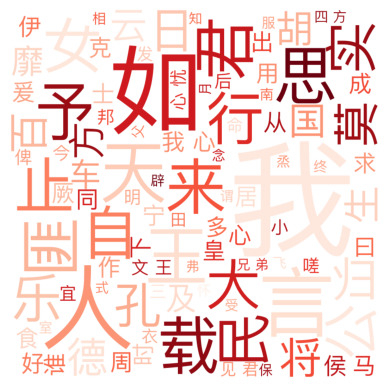

In [465]:
wc.to_file('shijing.png')  # 图片保存
# 5.显示图片
plt.figure('shijing')  # 图片显示的名字
plt.imshow(wc)
plt.axis('off')  # 关闭坐标
plt.show()

In [65]:
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models import CoherenceModel, LdaModel
from gensim import models
from gensim.test.utils import datapath
import operator
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [66]:
# 创建语料的词语词典，每个单独的词语都会被赋予一个索引
dictionary = corpora.Dictionary(words_s)

# 使用上面的词典，将转换文档列表（语料）变成 DT 矩阵
doc_term_matrix = [dictionary.doc2bow(doc) for doc in words_s]

# 使用 gensim 来创建 LDA 模型对象
Lda = gensim.models.ldamodel.LdaModel

# 在 DT 矩阵上运行和训练 LDA 模型
model = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=100, random_state=2021)

In [67]:
topic_names = ['民风民俗','讽刺批判','歌功颂德']
model.show_topics(num_topics=3, num_words=10)

[(0,
  '0.020*"我" + 0.015*"君" + 0.013*"如" + 0.012*"心" + 0.012*"人" + 0.008*"见" + 0.008*"载" + 0.008*"采" + 0.007*"止" + 0.007*"言"'),
 (1,
  '0.044*"我" + 0.016*"人" + 0.010*"君" + 0.009*"如" + 0.009*"心" + 0.008*"行" + 0.008*"言" + 0.006*"弟" + 0.006*"谁" + 0.006*"归"'),
 (2,
  '0.017*"王" + 0.012*"天" + 0.011*"我" + 0.008*"方" + 0.008*"如" + 0.008*"命" + 0.007*"大" + 0.007*"民" + 0.007*"言" + 0.006*"四"')]

In [68]:
topics_distribution = model.get_document_topics(doc_term_matrix, per_word_topics=False, minimum_probability=0)
topics = []
p = []
l = len(topics_distribution)
for i in range(l):
    temp = max(topics_distribution[i], key=operator.itemgetter(1))
    topics.append(topic_names[temp[0]])
    poems[i]['topic']=topic_names[temp[0]]
    poems[i]['topic_p']=temp[1]
    p.append(temp[1])
#poems['topic'] = topics
#poems['topic_p'] = p
poems 

[{'title': '关雎',
  'chapter': '国风',
  'section': '周南',
  'content': ['关关雎鸠，在河之洲。窈窕淑女，君子好逑。',
   '参差荇菜，左右流之。窈窕淑女，寤寐求之。',
   '求之不得，寤寐思服。悠哉悠哉，辗转反侧。',
   '参差荇菜，左右采之。窈窕淑女，琴瑟友之。',
   '参差荇菜，左右芼之。窈窕淑女，钟鼓乐之。'],
  'topic': '讽刺批判',
  'topic_p': 0.9886468},
 {'title': '葛覃',
  'chapter': '国风',
  'section': '周南',
  'content': ['葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。',
   '葛之覃兮，施于中谷，维叶莫莫。是刈是濩，为絺为绤，服之无斁。',
   '言告师氏，言告言归。薄污我私，薄浣我衣。害浣害否，归宁父母。'],
  'topic': '民风民俗',
  'topic_p': 0.9850411},
 {'title': '卷耳',
  'chapter': '国风',
  'section': '周南',
  'content': ['采采卷耳，不盈顷筐。嗟我怀人，置彼周行。',
   '陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永怀。',
   '陟彼高冈，我马玄黄。我姑酌彼兕觥，维以不永伤。',
   '陟彼砠矣，我马瘏矣，我仆痡矣，云何吁矣。'],
  'topic': '讽刺批判',
  'topic_p': 0.5046091},
 {'title': '樛木',
  'chapter': '国风',
  'section': '周南',
  'content': ['南有樛木，葛藟累之。乐只君子，福履绥之。',
   '南有樛木，葛藟荒之。乐只君子，福履将之。',
   '南有樛木，葛藟萦之。乐只君子，福履成之。'],
  'topic': '讽刺批判',
  'topic_p': 0.79604596},
 {'title': '螽斯',
  'chapter': '国风',
  'section': '周南',
  'content': ['螽斯羽，诜诜兮。宜尔子孙，振振兮。', '螽斯羽，薨薨兮。宜尔子孙。绳绳兮。', '螽斯

In [69]:
import pandas as pd
poems_df=pd.DataFrame(poems)
poems_df

,title,chapter,section,content,topic,topic_p
0,关雎,国风,周南,"[关关雎鸠，在河之洲。窈窕淑女，君子好逑。, 参差荇菜，左右流之。窈窕淑女，寤寐求之。, 求...",讽刺批判,0.988647
1,葛覃,国风,周南,"[葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。, 葛之覃兮，施于中谷，维叶莫...",民风民俗,0.985041
2,卷耳,国风,周南,"[采采卷耳，不盈顷筐。嗟我怀人，置彼周行。, 陟彼崔嵬，我马虺隤。我姑酌彼金罍，维以不永怀。...",讽刺批判,0.504609
3,樛木,国风,周南,"[南有樛木，葛藟累之。乐只君子，福履绥之。, 南有樛木，葛藟荒之。乐只君子，福履将之。, 南...",讽刺批判,0.796046
4,螽斯,国风,周南,"[螽斯羽，诜诜兮。宜尔子孙，振振兮。, 螽斯羽，薨薨兮。宜尔子孙。绳绳兮。, 螽斯羽，揖揖兮...",讽刺批判,0.965234
...,...,...,...,...,...,...
300,那,商颂,那之什,"[猗与那与！置我鞉鼓。奏鼓简简，衎我烈祖。汤孙奏假，绥我思成。, 鞉鼓渊渊，嘒嘒管声。既和且...",歌功颂德,0.989492
301,烈祖,商颂,那之什,"[嗟嗟烈祖！有秩斯祜。申锡无疆，及尔斯所。既载清酤，赉我思成。, 亦有和羹，既戒既平。鬷假无...",歌功颂德,0.989741
302,玄鸟,商颂,那之什,"[天命玄鸟，降而生商，宅殷土芒芒。古帝命武汤，正域彼四方。, 方命厥后，奄有九有。商之先后，...",歌功颂德,0.990584
303,长发,商颂,那之什,"[浚哲维商，长发其祥。洪水芒芒，禹敷下土方。外大国是疆，幅陨既长。有娀方将，帝立子生商。, ...",歌功颂德,0.995580


In [77]:
poems_df[poems_df.title=='扬之水']

,title,chapter,section,content,topic,topic_p
67,扬之水,国风,王风,"[扬之水，不流束薪。彼其之子，不与我戍申。怀哉怀哉，曷月予还归哉？, 扬之水，不流束楚。彼其...",讽刺批判,0.982665
91,扬之水,国风,郑风,"[扬之水，不流束楚。终鲜兄弟，维予与女。无信人之言，人实诳女。, 扬之水，不流束薪。终鲜兄弟...",讽刺批判,0.980019
115,扬之水,国风,唐风,"[扬之水，白石凿凿。素衣朱襮，从子于沃。既见君子，云何不乐？, 扬之水，白石皓皓。素衣朱绣，...",民风民俗,0.982517


In [70]:
feng_t=len(poems_df[(poems_df.chapter=='国风')& (poems_df.topic==0)])
feng=len(poems_df[poems_df.chapter=='国风'])
print(feng,feng_t,feng_t/feng)

160 0 0.0


In [71]:
ya_t=len(poems_df[((poems_df.chapter=='大雅')|(poems_df.chapter=='小雅'))& (poems_df.topic==1)])
ya=len(poems_df[(poems_df.chapter=='大雅')|(poems_df.chapter=='小雅')])
print(ya,ya_t,ya_t/ya)

105 0 0.0


In [72]:
song_df=poems_df[(poems_df.chapter=='周颂')|(poems_df.chapter=='鲁颂')|(poems_df.chapter=='商颂')]
song_t=len(song_df[song_df.topic==2])
song=len(song_df)
print(song,song_t,song_t/song)

40 0 0.0


In [73]:
poems_df.chapter

0      国风
1      国风
2      国风
3      国风
4      国风
       ..
300    商颂
301    商颂
302    商颂
303    商颂
304    商颂
Name: chapter, Length: 305, dtype: object

In [74]:
#poems_df.iloc[poems_df.groupby(['topic']).apply(lambda x: x['topic_p'].idxmax())]
poems_df.groupby('topic').apply(lambda x: x.nlargest(5, 'topic_p'))


title chapter section  \
topic                             
歌功颂德  299    閟宫      鲁颂     駉之什   
      240    皇矣      大雅    文王之什   
      260    韩奕      大雅     荡之什   
      254     荡      大雅     荡之什   
      258    崧高      大雅     荡之什   
民风民俗  153    七月      国风      豳风   
      166    采薇      小雅    鹿鸣之什   
      77   大叔于田      国风      郑风   
      178    车攻      小雅  南有嘉鱼之什   
      56     硕人      国风      卫风   
讽刺批判  202    大东      小雅    谷风之什   
      206    小明      小雅    谷风之什   
      155    东山      国风      豳风   
      198   何人斯      小雅   节南山之什   
      247    凫鹥      大雅    生民之什   

                                                     content topic   topic_p  
topic                                                                         
歌功颂德  299  [閟宫有侐，实实枚枚。赫赫姜嫄，其德不回。上帝是依，无灾无害。, 弥月不迟，是生后稷。降之百...  歌功颂德  0.998022  
      240  [皇矣上帝，临下有赫。监观四方，求民之莫。维此二国，其政不获。, 维彼四国，爰究爰度。上帝耆...  歌功颂德  0.997401  
      260  [奕奕梁山，维禹甸之，有倬其道。, 韩侯受命，王亲命之：缵戎祖考，无废朕命。, 夙夜匪解，虔...  歌功颂德  0.996725  
      254  [荡荡上帝，下民之辟。疾威上帝，其命多辟。, 天生烝民，其命匪谌。靡不有初，鲜克有终。, 文...  歌功颂德  0.996695  
      258  [崧高维岳，骏极于天。维岳降神，生甫及申。维申及甫，维周之翰。四国于蕃。四方于宣。, 亹亹申...  歌功颂德  0.996372  
民风民俗  153  [七月流火，九月授衣。一之日觱发，二之日栗烈。无衣无褐，何以卒岁？, 三之日于耜，四之日举趾...  民风民俗  0.997688  
      166  [采薇采薇，薇亦作止。曰归曰归，岁亦莫止。靡室靡家，玁狁之故。不遑启居，玁狁之故。, 采薇采...  民风民俗  0.995104  
      77   [叔于田，乘乘马。执辔如组，两骖如舞。叔在薮，火烈具举。襢裼暴虎，献于公所。将叔勿狃，戒其伤...  民风民俗  0.992767  
      178  [我车既攻，我马既同。四牡庞庞，驾言徂东。, 田车既好，田牡孔阜。东有甫草，驾言行狩。, 之...  民风民俗  0.992417  
      56   [硕人其颀，衣锦褧衣。齐侯之子，卫侯之妻。东宫之妹，邢侯之姨，谭公维私。, 手如柔荑，肤如凝...  民风民俗  0.992411  
讽刺批判  202  [有饛簋飧，有捄棘匕。周道如砥，其直如矢。君子所履，小人所视。眷言顾之，潸焉出涕。, 小东大...  讽刺批判  0.994937  
      206  [明明上天，照临下土。我征徂西，至于艽野。二月初吉，载离寒暑。, 心之忧矣，其毒大苦。念彼共...  讽刺批判  0.994895  
      155  [我徂东山，慆慆不归。我来自东，零雨其濛。我东曰归，我心西悲。, 制彼裳衣，勿士行枚。蜎蜎者...  讽刺批判  0.994693  
      198  [彼何人斯？其心孔艰。胡逝我梁，不入我门？伊谁云从？维暴之云。, 二人从行，谁为此祸？胡逝我...  讽刺批判  0.993828  
      247  [凫鹥在泾，公尸在燕来宁。尔酒既清，尔肴既馨。公尸燕饮，福禄来成。, 凫鹥在沙，公尸来燕来宜...  讽刺批判  0.993148

In [75]:
poems_df[poems_df.topic=='民风民俗']

,title,chapter,section,content,topic,topic_p
1,葛覃,国风,周南,"[葛之覃兮，施于中谷，维叶萋萋。黄鸟于飞，集于灌木，其鸣喈喈。, 葛之覃兮，施于中谷，维叶莫...",民风民俗,0.985041
7,芣苡,国风,周南,"[采采芣苡，薄言采之。采采芣苡，薄言有之。, 采采芣苡，薄言掇之。采采芣苡，薄言捋之。, 采...",民风民俗,0.983640
9,汝坟,国风,周南,"[遵彼汝坟，伐其条枚。未见君子，惄如调饥。, 遵彼汝坟，伐其条肄。既见君子，不我遐弃。, 鲂...",民风民俗,0.980560
11,鹊巢,国风,召南,"[维鹊有巢，维鸠居之。之子于归，百两御之。, 维鹊有巢，维鸠方之。之子于归，百两将之。, 维...",民风民俗,0.967533
12,采蘩,国风,召南,"[于以采蘩？于沼于沚。于以用之？公侯之事。, 于以采蘩？于涧之中。于以用之？公侯之宫。, 被...",民风民俗,0.778198
...,...,...,...,...,...,...
289,载芟,周颂,闵予小子之什,"[载芟载柞，其耕泽泽。千耦其耘，徂隰徂畛。侯主侯伯，侯亚侯旅，侯彊侯以。, 有嗿其馌，思媚其...",民风民俗,0.579949
290,良耜,周颂,闵予小子之什,"[畟畟良耜，俶载南亩。播厥百谷，实函斯活。或来瞻女，载筐及莒，其饟伊黍。, 其笠伊纠，其镈斯...",民风民俗,0.988963
291,丝衣,周颂,闵予小子之什,[丝衣其紑，载弁俅俅。自堂徂基，自羊徂牛，鼐鼎及鼒，兕觥其觩。旨酒思柔。不吴不敖，胡考之休。],民风民俗,0.976703
296,駉,鲁颂,駉之什,"[駉駉牡马，在坰之野。薄言駉者，有驈有皇，有骊有黄，以车彭彭。思无疆思，马斯臧。, 駉駉牡马...",民风民俗,0.991436


In [477]:
def topics_pie(df, name):
    cdict = {'民风民俗': 'steelblue', '讽刺批判': 'orange','歌功颂德':'indianred'}
    topic_counts = df['topic'].value_counts()
    topic_counts = topic_counts.rename('')
    colors = [cdict[x] for x in topic_counts.index]
    topic_counts.plot(kind='pie', colors=colors, autopct='%.1f%%', radius=1,startangle=180, counterclock=False, title=name+'主题分布')
    plt.show()

In [478]:
topic_counts = poems_df['topic'].value_counts()
topic_counts = topic_counts.rename('')
topic_counts.index

Index(['民风民俗', '歌功颂德', '讽刺批判'], dtype='object', name='topic')

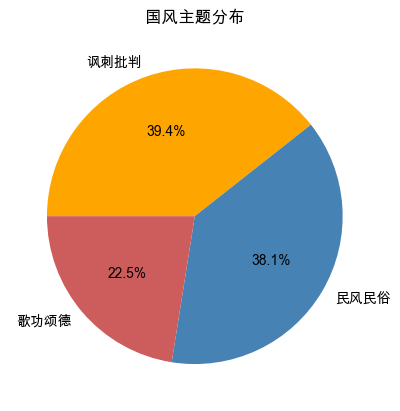

In [479]:
t = poems_df[poems_df['chapter']=='国风']
topics_pie(t, '国风')

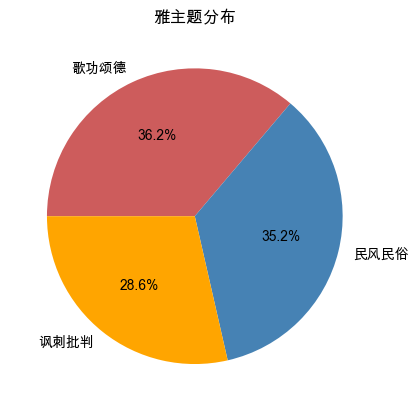

In [480]:
t=poems_df[(poems_df.chapter=='大雅')|(poems_df.chapter=='小雅')]
topics_pie(t, '雅')

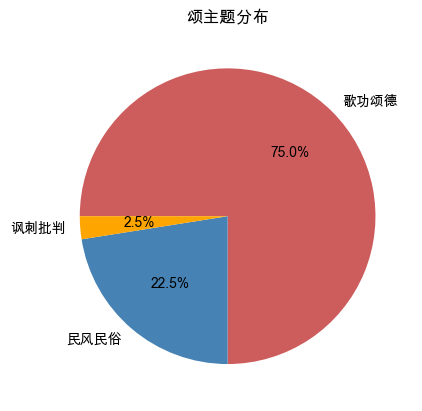

In [481]:
t=poems_df[(poems_df.chapter=='周颂')|(poems_df.chapter=='鲁颂')|(poems_df.chapter=='商颂')]
topics_pie(t, '颂')

In [76]:
import pyLDAvis.gensim_models

import warnings
try:
  import pyLDAvis.gensim
  CAN_VISUALIZE = True
  pyLDAvis.enable_notebook()
  from IPython.display import display
except ImportError:
    ValueError("SKIP: please install pyLDAvis")
    CAN_VISUALIZE = False
warnings.filterwarnings('ignore')  # 忽视所有的提示
%matplotlib inline

vis = pyLDAvis.gensim_models.prepare(model, doc_term_matrix,dictionary)
pyLDAvis.show(vis, local=False) # local=False


Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [17/Apr/2024 21:05:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2024 21:05:10] code 404, message Not Found
127.0.0.1 - - [17/Apr/2024 21:05:10] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


In [482]:
import warnings  
import logging  
import os.path  
import sys  
import multiprocessing  
import gensim  
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

out_model = 'seg.model'  
out_vector = 'xx.vector' 
# 训练CBOW.模型  
model = Word2Vec(words, vector_size=100, window=5, min_count=5,workers=multiprocessing.cpu_count())  
# 保存模型  
model.save(out_model)  
# 保存词向量  
model.wv.save_word2vec_format(out_vector, binary=False)

In [483]:
from gensim.models import Word2Vec

model = Word2Vec.load('seg.model')
    
#y1 = model.wv.similarity("车","载")
#print( "“车”和“载”的相似度为：", y1)
#print( "--------\n")

 

# 计算某个词的相关词列表

y2 = model.wv.most_similar(positive=["车"], topn=10) 
print("和“车”最相关的字：")
for item in y2:
    print(item[0], "{:.6f}".format(item[1]))
print( "--------\n")

y2 = model.wv.most_similar(positive=["饮"], topn=10) 
print("和“饮”最相关的字：")
for item in y2:
    print(item[0], "{:.6f}".format(item[1]))
print( "--------\n")

y2 = model.wv.most_similar(positive=["帝"], topn=10) 
print("和“帝”最相关的字：")
for item in y2:
     print(item[0], "{:.6f}".format(item[1]))
print( "--------\n")

和“车”最相关的字：
我 0.999666
载 0.999617
方 0.999603
人 0.999593
匪 0.999586
公 0.999577
予 0.999576
四 0.999563
岂 0.999559
月 0.999534
--------

和“饮”最相关的字：
及 0.999426
食 0.999416
酒 0.999410
民 0.999405
方 0.999401
我 0.999399
如 0.999382
来 0.999370
百 0.999370
君 0.999366
--------

和“帝”最相关的字：
天 0.999494
下 0.999429
夫 0.999412
如 0.999411
日 0.999403
大 0.999403
人 0.999388
乐 0.999385
公 0.999381
我 0.999380
--------


In [10]:
import jieba

corpus = []
documents = []

#加载停用词
stopword2 = []
stopword = '而｜何｜乎｜乃｜其｜且｜若｜所｜为｜焉｜以｜因｜与｜于｜也｜则｜者｜之｜不｜得｜可｜是｜已｜此｜的｜兮｜中｜矣｜\
    在｜彼｜又｜亦｜有｜无｜既｜或｜之｜？|！｜维｜尔｜子｜哉｜斯|\n|)|\ue85d|\ue85f|:|?|{|}|“|”|。|，|、|【|】|\u3000|◎|.|（|！|'
for line in stopword:
    stopword2.append(line.strip())
for i in range(len(poems)):
    sentences=poems[i]['content']
    for each in sentences:
        each = each.replace('\n', '').replace(' ', '').strip()
        documents.append(each)
        each = list(jieba.cut(each))
        text = [w for w in each if  not w  in stopword]
        corpus.append(text)
corpus


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/dv/l0blp_fs1dg5s550h56mwzkr0000gn/T/jieba.cache
Loading model cost 0.342 seconds.
Prefix dict has been built successfully.


[['关关雎', '鸠', '河之洲', '窈窕淑女', '君子好逑'],
 ['参差', '荇', '菜', '左右', '流之', '窈窕淑女', '寤寐求之'],
 ['求之不得', '寤寐', '思服', '悠哉悠哉', '辗转反侧'],
 ['参差', '荇', '菜', '左右', '采之', '窈窕淑女', '琴瑟', '友之'],
 ['参差', '荇', '菜', '左右', '芼', '窈窕淑女', '钟', '鼓乐'],
 ['葛之覃', '施于', '中谷', '维叶', '萋', '萋', '黄鸟', '飞', '集于', '灌木', '其鸣喈', '喈'],
 ['葛之覃', '施于', '中谷', '维叶莫莫', '刈', '濩', '絺', '绤', '服之无', '斁'],
 ['言告',
  '师氏',
  '言告',
  '言',
  '归',
  '薄污',
  '我',
  '私',
  '薄',
  '浣',
  '我',
  '衣',
  '害',
  '浣',
  '害否',
  '归宁',
  '父母'],
 ['采采', '卷', '耳', '不盈顷', '筐', '嗟', '我', '怀人', '置', '周行'],
 ['陟', '崔嵬', '我马', '虺', '隤', '我', '姑酌', '彼金', '罍', '维以', '不永怀'],
 ['陟', '高冈', '我马', '玄黄', '我', '姑酌', '兕', '觥', '维以', '不永伤'],
 ['陟', '砠', '我马', '瘏', '我', '仆', '痡', '云何吁'],
 ['南', '樛', '木', '葛', '藟', '累', '乐只', '君子', '福履绥'],
 ['南', '樛', '木', '葛', '藟', '荒', '乐只', '君子', '福履', '将'],
 ['南', '樛', '木', '葛', '藟', '萦', '乐只', '君子', '福履成'],
 ['螽斯', '羽', '诜', '诜', '宜尔', '子孙', '振振'],
 ['螽斯', '羽', '薨', '薨', '宜尔', '子孙', '绳绳'],
 ['螽斯', '羽', '揖', '揖', '宜尔', '子孙', '蛰', '

In [11]:
from gensim.similarities import WmdSimilarity
import jieba
from gensim.models import Word2Vec

In [13]:
# Train Word2Vec 
model = Word2Vec(corpus, workers=3, vector_size=100)
# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
instance = WmdSimilarity(corpus, model.wv, num_best=10)

In [63]:
sent = "死生契阔，与子成说。执子之手，与子偕老。"
sent_w = list(jieba.cut(sent))
query = ",".join(sent_w)
query = [w for w in sent_w if  not w in stopword]
#在相似性类中的“查找”query

sims = instance[query]
# 返回相似结果
print('查询语句:')
print(sent)
print('查找结果:')
for i in range(num_best):
    print('sim = %.4f' % sims[i][1])
    print(documents[sims[i][0]])   

查询语句:
死生契阔，与子成说。执子之手，与子偕老。
查找结果:
sim = 1.0000
死生契阔，与子成说。执子之手，与子偕老。
sim = 0.6102
习习谷风，以阴以雨。黾勉同心，不宜有怒。采葑采菲，无以下体？德音莫违，及尔同死。
sim = 0.6102
野有死麕，白茅包之。有女怀春，吉士诱之。
sim = 0.6102
彼宜有罪，女覆说之。
sim = 0.5353
习习谷风，维山崔嵬。无草不死，无木不萎。忘我大德，思我小怨。
sim = 0.5243
蜉蝣掘阅，麻衣如雪。心之忧矣，于我归说。
sim = 0.5152
相彼投兔，尚或先之。行有死人，尚或墐之。君子秉心，维其忍之。心之忧矣，涕既陨之。
sim = 0.5094
如彼雨雪，先集维霰。死丧无日，无几相见。乐酒今夕，君子维宴。
sim = 0.5068
山有枢，隰有榆。子有衣裳，弗曳弗娄。子有车马，弗驰弗驱。宛其死矣，他人是愉。
sim = 0.5026
桑之未落，其叶沃若。于嗟鸠兮！无食桑葚。于嗟女兮！无与士耽。士之耽兮，犹可说也。女之耽兮，不可说也。
